In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import math
import time
import pandas as pd
from env import *
%matplotlib inline

plt.rcParams["figure.figsize"] = [8,8]
# plt.rcParams["figure.figsize"] = [4,4]

## Generate random graph and random simple path

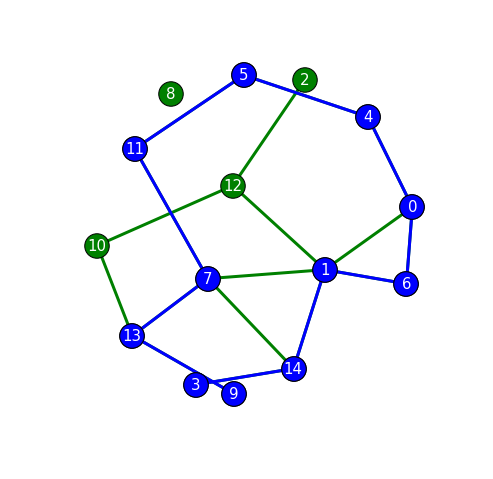

[(0, 1), (0, 4), (0, 6), (1, 12), (1, 14), (1, 6), (1, 7), (2, 12), (3, 14), (4, 5), (5, 11), (7, 11), (7, 13), (7, 14), (9, 13), (10, 12), (10, 13)]


In [2]:
# Random graph
G = nx.fast_gnp_random_graph(15, 0.2)
pos = nx.spring_layout(G)

# Random path
startPoint, finishPoint = random.choice(G.nodes()), random.choice(G.nodes())

paths = list(nx.all_simple_paths(G, startPoint, finishPoint))
if paths:
    currentPathRandom = random.choice(paths)
else:
    currentPathRandom = list(G.edges()[0])

currentPathPairs = zip(currentPathRandom[0::1],currentPathRandom[1::1])

labels = {x : str(x) for x in G.nodes()}

nx.draw_networkx_nodes(G, pos = pos, node_color = "green", node_size = 600, with_labels=False)
nx.draw_networkx_nodes(G, pos = pos, node_color = "blue", node_size = 600, nodelist = currentPathRandom, with_labels=False)
nx.draw_networkx_labels(G,pos, labels, font_color = "white", font_size = 15)

nx.draw_networkx_edges(G, pos = pos, width = 3, edge_color = "green")
nx.draw_networkx_edges(G, pos = pos, width = 3, edge_color = "blue", edgelist = currentPathPairs)

timestamp = str(time.time())

plt.axis('off')
# plt.savefig("../hw_plots/{}_RANDOM.png".format(timestamp), format = "PNG")
plt.show()

# List of edges not used in current path
nonUsedEdges = []
for edge in G.edges():
    if edge not in currentPathPairs and edge[::-1] not in currentPathPairs:
        nonUsedEdges.append(edge)
        nonUsedEdges.append(edge[::-1])
        
print G.edges()

## Metropolis with annealing

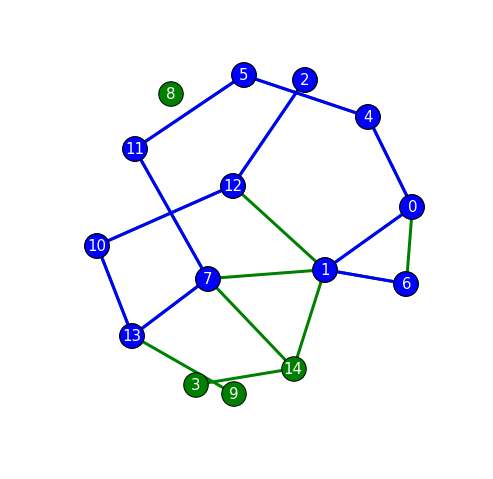

In [3]:
currentPath = currentPathRandom

currentEnergy = calculateEnergy(currentPath)
initialTemperature = 100000
endTemperature = 1
T = initialTemperature

for i in range(1, 10000):
    stateCandidate, newNonUsedEdges = generateStateCandidate(currentPath, nonUsedEdges, G)
    candidateEnergy = calculateEnergy(stateCandidate)
        
    if candidateEnergy >= currentEnergy:
        currentPath = stateCandidate
        currentEnergy = candidateEnergy
        nonUsedEdges = newNonUsedEdges
    else:
        p = getTransitionProbability(currentEnergy - candidateEnergy, T)
        if isTransition(p):
            currentPath = stateCandidate
            currentEnergy = candidateEnergy
            nonUsedEdges = newNonUsedEdges
    T = decreaseTemperature(initialTemperature, i)
    if T <= endTemperature:
        break

nx.draw_networkx_nodes(G, pos = pos, node_color = "green", node_size = 600, with_labels=False)
nx.draw_networkx_nodes(G, pos = pos, node_color = "blue", node_size = 600, nodelist = currentPath, with_labels=False)
nx.draw_networkx_labels(G,pos, labels, font_color = "white", font_size = 15)

currentPathPairs = zip(currentPath[0::1],currentPath[1::1])
nx.draw_networkx_edges(G, pos = pos, width = 3, edge_color = "green")
nx.draw_networkx_edges(G, pos = pos, width = 3, edge_color = "blue", edgelist = currentPathPairs)

plt.axis('off')
# plt.savefig("../hw_plots/{}_GRAD.png".format(timestamp), format = "PNG")
plt.show()

## Metropolis without annealing

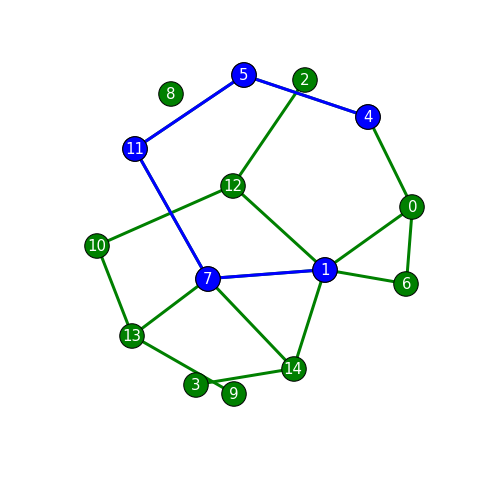

In [4]:
currentPath = currentPathRandom

currentEnergy = calculateEnergy(currentPath)
initialTemperature = 100
endTemperature = 1
T = initialTemperature

for i in range(1, 10000):
    stateCandidate, newNonUsedEdges = generateStateCandidate(currentPath, nonUsedEdges, G)
    candidateEnergy = calculateEnergy(stateCandidate)
        
    if candidateEnergy >= currentEnergy:
        currentPath = stateCandidate
        currentEnergy = candidateEnergy
        nonUsedEdges = newNonUsedEdges
    else:
        p = getTransitionProbability(currentEnergy - candidateEnergy, T)
        if isTransition(p):
            currentPath = stateCandidate
            currentEnergy = candidateEnergy
            nonUsedEdges = newNonUsedEdges
#     T = decreaseTemperature(initialTemperature, i)
    if T <= endTemperature:
        break

nx.draw_networkx_nodes(G, pos = pos, node_color = "green", node_size = 600, with_labels=False)
nx.draw_networkx_nodes(G, pos = pos, node_color = "blue", node_size = 600, nodelist = currentPath, with_labels=False)
nx.draw_networkx_labels(G,pos, labels, font_color = "white", font_size = 15)

currentPathPairs = zip(currentPath[0::1],currentPath[1::1])
nx.draw_networkx_edges(G, pos = pos, width = 3, edge_color = "green")
nx.draw_networkx_edges(G, pos = pos, width = 3, edge_color = "blue", edgelist = currentPathPairs)

plt.axis('off')
# plt.savefig("../hw_plots/{}_GRAD.png".format(timestamp), format = "PNG")
plt.show()

## Gradient descent

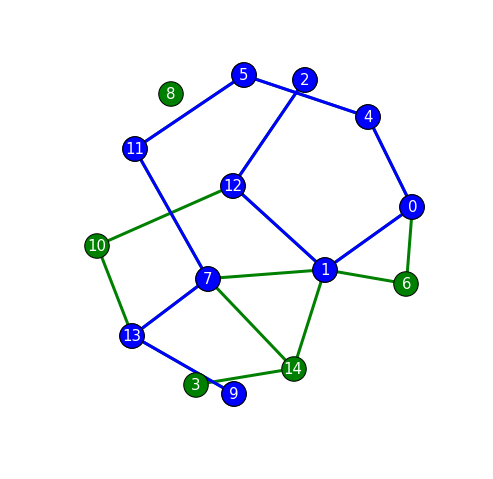

In [5]:
currentPath = currentPathRandom

def findCandidate(place, path):
    node = path[place]
    nodeNeighbours = G.neighbors(node)
    candidateFound = False
    candidate = 0
    for node in nodeNeighbours:
        if node not in path:
            candidateFound = True
            candidate = node
            break
    return candidateFound, candidate

while True: # Insert nodes to the left
    newNodeFound, newNode = findCandidate(0, currentPath)
    if newNodeFound:
        currentPath.insert(0, newNode)
    else:
        break

while True: # Insert nodes to the right
    newNodeFound, newNode = findCandidate(-1, currentPath)
    if newNodeFound:
        currentPath.append(newNode)
    else:
        break

# print currentPath

nx.draw_networkx_nodes(G, pos = pos, node_color = "green", node_size = 600, with_labels=False)
nx.draw_networkx_nodes(G, pos = pos, node_color = "blue", node_size = 600, nodelist = currentPath, with_labels=False)
nx.draw_networkx_labels(G,pos, labels, font_color = "white", font_size = 15)

currentPathPairs = zip(currentPath[0::1],currentPath[1::1])
nx.draw_networkx_edges(G, pos = pos, width = 3, edge_color = "green")
nx.draw_networkx_edges(G, pos = pos, width = 3, edge_color = "blue", edgelist = currentPathPairs)

plt.axis('off')
# plt.savefig("../hw_plots/{}_GRAD.png".format(timestamp), format = "PNG")
plt.show()

### Review

In [16]:
columns= ["Nodes", "Probability of node", "Metropolis", "Metropolis + annealing", "Gradient descent"]
data = [{}]

In [25]:
for step in range(5):
    data[-1]["Nodes"] = 19
    data[-1]["Probability of node"] = 0.1
    
#     print step
    # Random graph
    G = nx.fast_gnp_random_graph(19, 0.1)
    pos = nx.spring_layout(G)

    # Random path
    startPoint, finishPoint = random.choice(G.nodes()), random.choice(G.nodes())

    paths = list(nx.all_simple_paths(G, startPoint, finishPoint))
    if paths:
        currentPathRandom = random.choice(paths)
    else:
        currentPathRandom = list(G.edges()[0])

    currentPathPairs = zip(currentPathRandom[0::1],currentPathRandom[1::1])

    labels = {x : str(x) for x in G.nodes()}

#     nx.draw_networkx_nodes(G, pos = pos, node_color = "green", node_size = 600, with_labels=False)
#     nx.draw_networkx_nodes(G, pos = pos, node_color = "blue", node_size = 600, nodelist = currentPathRandom, with_labels=False)
#     nx.draw_networkx_labels(G,pos, labels, font_color = "white", font_size = 15)

#     nx.draw_networkx_edges(G, pos = pos, width = 3, edge_color = "green")
#     nx.draw_networkx_edges(G, pos = pos, width = 3, edge_color = "blue", edgelist = currentPathPairs)

    timestamp = str(time.time())

#     plt.axis('off')
    # plt.savefig("../hw_plots/{}_RANDOM.png".format(timestamp), format = "PNG")
    # plt.show()

    # List of edges not used in current path
    nonUsedEdges = []
    for edge in G.edges():
        if edge not in currentPathPairs and edge[::-1] not in currentPathPairs:
            nonUsedEdges.append(edge)
            nonUsedEdges.append(edge[::-1])
    # ================================
    currentPath = currentPathRandom

    currentEnergy = calculateEnergy(currentPath)
    initialTemperature = 100000
    endTemperature = 1
    T = initialTemperature

    for i in range(1, 10000):
        stateCandidate, newNonUsedEdges = generateStateCandidate(currentPath, nonUsedEdges, G)
        candidateEnergy = calculateEnergy(stateCandidate)

        if candidateEnergy >= currentEnergy:
            currentPath = stateCandidate
            currentEnergy = candidateEnergy
            nonUsedEdges = newNonUsedEdges
        else:
            p = getTransitionProbability(currentEnergy - candidateEnergy, T)
            if isTransition(p):
                currentPath = stateCandidate
                currentEnergy = candidateEnergy
                nonUsedEdges = newNonUsedEdges
        T = decreaseTemperature(initialTemperature, i)
        if T <= endTemperature:
            break

#     nx.draw_networkx_nodes(G, pos = pos, node_color = "green", node_size = 600, with_labels=False)
#     nx.draw_networkx_nodes(G, pos = pos, node_color = "blue", node_size = 600, nodelist = currentPath, with_labels=False)
#     nx.draw_networkx_labels(G,pos, labels, font_color = "white", font_size = 15)

#     currentPathPairs = zip(currentPath[0::1],currentPath[1::1])
#     nx.draw_networkx_edges(G, pos = pos, width = 3, edge_color = "green")
#     nx.draw_networkx_edges(G, pos = pos, width = 3, edge_color = "blue", edgelist = currentPathPairs)

    # plt.axis('off')
    # plt.savefig("../hw_plots/{}_GRAD.png".format(timestamp), format = "PNG")
    # plt.show()
    data[-1]["Metropolis + annealing"] = len(currentPath)
    # ===========================

    currentPath = currentPathRandom

    currentEnergy = calculateEnergy(currentPath)
    initialTemperature = 100
    endTemperature = 1
    T = initialTemperature

    for i in range(1, 10000):
        stateCandidate, newNonUsedEdges = generateStateCandidate(currentPath, nonUsedEdges, G)
        candidateEnergy = calculateEnergy(stateCandidate)

        if candidateEnergy >= currentEnergy:
            currentPath = stateCandidate
            currentEnergy = candidateEnergy
            nonUsedEdges = newNonUsedEdges
        else:
            p = getTransitionProbability(currentEnergy - candidateEnergy, T)
            if isTransition(p):
                currentPath = stateCandidate
                currentEnergy = candidateEnergy
                nonUsedEdges = newNonUsedEdges
    #     T = decreaseTemperature(initialTemperature, i)
        if T <= endTemperature:
            break

#     nx.draw_networkx_nodes(G, pos = pos, node_color = "green", node_size = 600, with_labels=False)
#     nx.draw_networkx_nodes(G, pos = pos, node_color = "blue", node_size = 600, nodelist = currentPath, with_labels=False)
#     nx.draw_networkx_labels(G,pos, labels, font_color = "white", font_size = 15)

#     currentPathPairs = zip(currentPath[0::1],currentPath[1::1])
#     nx.draw_networkx_edges(G, pos = pos, width = 3, edge_color = "green")
#     nx.draw_networkx_edges(G, pos = pos, width = 3, edge_color = "blue", edgelist = currentPathPairs)

    # plt.axis('off')
    # plt.savefig("../hw_plots/{}_GRAD.png".format(timestamp), format = "PNG")
    # plt.show()
    
    data[-1]["Metropolis"] = len(currentPath)
    # ==========

    currentPath = currentPathRandom

    def findCandidate(place, path):
        node = path[place]
        nodeNeighbours = G.neighbors(node)
        candidateFound = False
        candidate = 0
        for node in nodeNeighbours:
            if node not in path:
                candidateFound = True
                candidate = node
                break
        return candidateFound, candidate

    while True: # Insert nodes to the left
        newNodeFound, newNode = findCandidate(0, currentPath)
        if newNodeFound:
            currentPath.insert(0, newNode)
        else:
            break

    while True: # Insert nodes to the right
        newNodeFound, newNode = findCandidate(-1, currentPath)
        if newNodeFound:
            currentPath.append(newNode)
        else:
            break

    # print currentPath

#     nx.draw_networkx_nodes(G, pos = pos, node_color = "green", node_size = 600, with_labels=False)
#     nx.draw_networkx_nodes(G, pos = pos, node_color = "blue", node_size = 600, nodelist = currentPath, with_labels=False)
#     nx.draw_networkx_labels(G,pos, labels, font_color = "white", font_size = 15)

#     currentPathPairs = zip(currentPath[0::1],currentPath[1::1])
#     nx.draw_networkx_edges(G, pos = pos, width = 3, edge_color = "green")
#     nx.draw_networkx_edges(G, pos = pos, width = 3, edge_color = "blue", edgelist = currentPathPairs)

    # plt.axis('off')
    # plt.savefig("../hw_plots/{}_GRAD.png".format(timestamp), format = "PNG")
    # plt.show()
    
    data[-1]["Gradient descent"] = len(currentPath)
    
    data.append({})

In [28]:
df = pd.DataFrame(data = data, columns = columns)

print df.to_csv("table_result.csv", columns = columns)

None
